## Problem Statement: Predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.
### Team: ML061B2

### FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

### Tasks:

1.Clean Data(Null value removal, Outlier identification)

2.Null Values(Dropping the rows /Columns and what is the reason or how you are imputing the null).

3.EDA(Minor Project to understand the relations, repeat the same here)

4.Handle Categorical Variable(Using Label Encoding/One hot encoding)

5.Try to do data scaling for Kilometers driven

6.Do the train test  split

7.Apply different ML regression Algorithms

8.Calculate the error metrics.

In [1]:
import pandas as pd

## Reading the file

In [2]:
df = pd.read_excel(r'C:\Users\Administrator\Desktop\py4e\Data_Train.xlsx')

In [226]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


1. Clearly, we have 5 numeric attributes viz. Kilometers driven, Mileage, Engine, Power and number of seats, three of which will need to be edited to remove the units.
2. Name of the car consists of three parts, the name of the brand, the model name and the model no. We will need to separate them because they might be indivisually linked to the price of the car. For intamce, an Audi will almost always be priced higher than a Maruti, no matter what the other features are (exceptions might exist).
3. The other categorical variable are Location, Year, Fuel type, Transmission and owner type. We will need to encode them to convert them into numeric type of data.

In [227]:
df.tail(30)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5989,Audi A4 35 TDI Premium Plus,Coimbatore,2013,58629,Diesel,Automatic,Second,18.25 kmpl,1968 CC,187.74 bhp,5.0,16.52
5990,Tata New Safari DICOR 2.2 VX 4x2,Pune,2008,86000,Diesel,Manual,Third,13.93 kmpl,2179 CC,138 bhp,7.0,0.60
5991,Maruti Swift VDI,Hyderabad,2012,68238,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,4.80
5992,Skoda Superb Elegance 1.8 TSI AT,Mumbai,2011,42036,Petrol,Automatic,First,13.7 kmpl,1798 CC,157.75 bhp,5.0,6.25
5993,Hyundai Elantra SX,Mumbai,2014,55619,Petrol,Manual,First,16.3 kmpl,1797 CC,147.5 bhp,5.0,8.30
5994,Honda City 1.5 E MT,Pune,2009,60000,Petrol,Manual,Third,17.0 kmpl,1497 CC,118 bhp,5.0,3.25
5995,Renault Duster 85PS Diesel RxL Explore,Pune,2015,30000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,7.75
5996,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36 kmpl,2179 CC,187.7 bhp,5.0,30.54
5997,Maruti Wagon R Duo Lxi,Jaipur,2010,70000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.27
5998,Volkswagen Polo IPL II 1.2 Petrol Highline,Pune,2010,70290,Petrol,Manual,Second,17.24 kmpl,1198 CC,73.9 bhp,5.0,2.96


In [228]:
df.shape

(6019, 12)

We have 6000 rows in the dataset. Therefore, we can be a bit liberal while dropping rows and still have enough data to satisfactorily fit a model.

## Finding Null Values

In [229]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Clearly, none of the columns have too many null values, so dropping the entire column would not be prudent. Hence, we clean the dataset by dropping the rows with null values instead.

In [230]:
import numpy as np

## Dropping Null Values

In [231]:
df = df.dropna()

In [232]:
df.shape

(5975, 12)

In [233]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [234]:
from sklearn.preprocessing import LabelEncoder

In [235]:
le = LabelEncoder()

We will now proceed with encoding the categorical variables to convert them to numeric types which can be used as an input in our ML models

In [236]:
df['fuel_type'] = le.fit_transform(df['Fuel_Type'])
df['transmission'] = le.fit_transform(df['Transmission'])
df['owner_type'] = le.fit_transform(df['Owner_Type'])
df['Year'] = le.fit_transform(df['Year'])
df['location'] = le.fit_transform(df['Location'])

We need to get rid of the units of our numeric data types like Engine and Power.

In [237]:
df['Engine'] = df['Engine'].str.replace("CC","").astype(int)
df['Mileage'] = df['Mileage'].str.replace("kmpl","")
df['Mileage'] = df['Mileage'].str.replace("km/kg","")
df['Mileage'] = df['Mileage'].astype(float)
df["Power"] = df["Power"].str.replace("bhp","") 

In [238]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,fuel_type,transmission,owner_type,location
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,0,1,0,9
1,Hyundai Creta 1.6 CRDi SX Option,Pune,17,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,1,1,0,10
2,Honda Jazz V,Chennai,13,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,3,1,0,2
3,Maruti Ertiga VDI,Chennai,14,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,1,1,0,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,15,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,1,0,2,3


In [239]:
df.head()
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
fuel_type            0
transmission         0
owner_type           0
location             0
dtype: int64

With our null values out of the way, we can now do some correlation to find out the mathematical relations between the given features to see if any of them show an overwhelming correlation coefficient (i.e. close to 1). That would allow us to get rid of those features, and avoid the *curse of dimensionality*

In [240]:
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline  

In [241]:
from matplotlib.pyplot import rcParams

In [242]:
rcParams.keys()

C:\Users\Shiv\Anaconda3\lib\_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [243]:
rcParams['figure.figsize'] = (10,8)

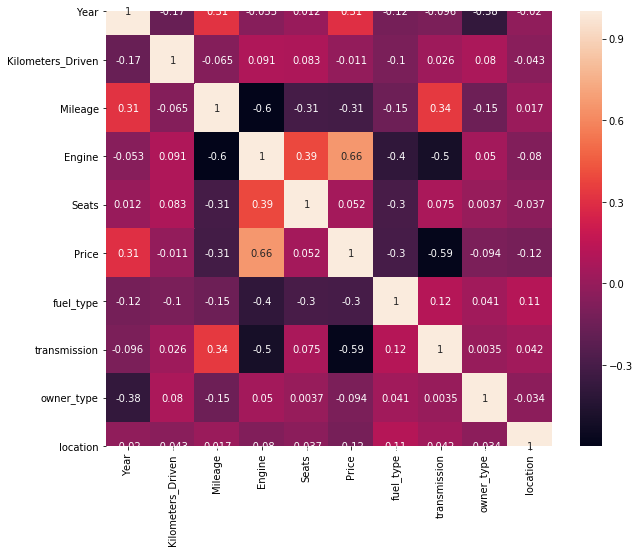

In [244]:
sb.heatmap(df.corr(),annot=True)

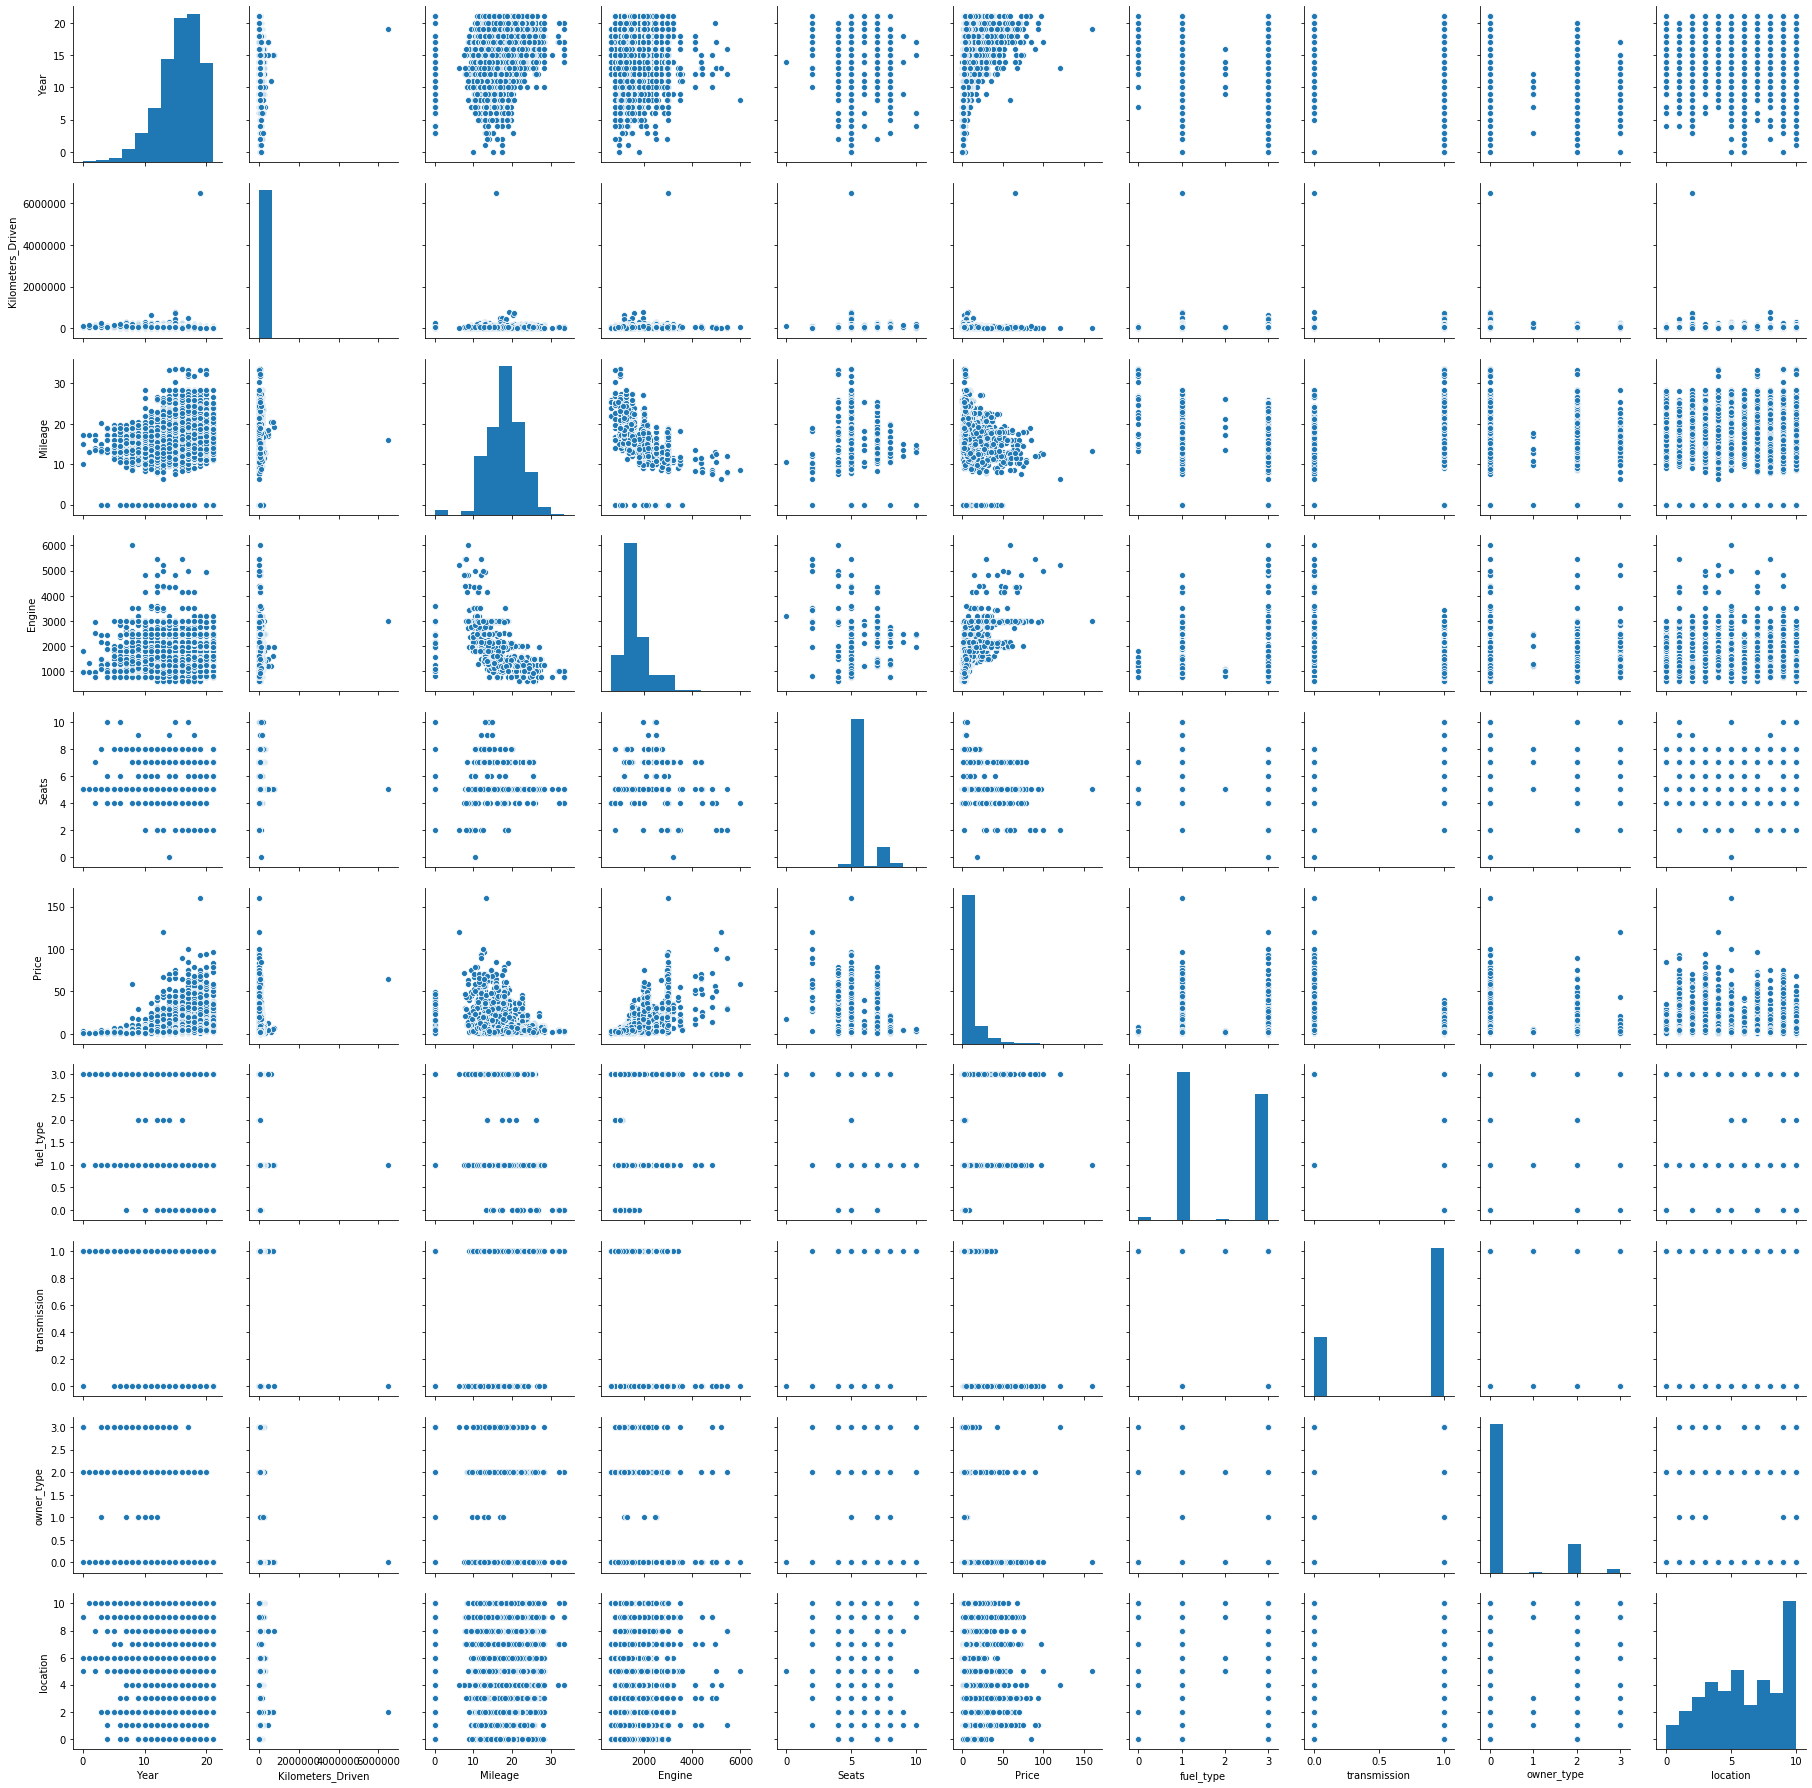

In [245]:
sb.pairplot(df)

Clearly, none of the pair of features show the kind of similarity that we were looking for. We can now proceed to outlier identification. 

## Outlier Identification

In [246]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price,fuel_type,transmission,owner_type,location
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,15.386778,5.867431e+04,18.179408,1621.606695,5.278828,9.501647,1.900753,0.713975,0.376067,5.616402
std,3.247238,9.155851e+04,4.521801,601.036987,0.808959,11.205736,1.008347,0.451939,0.815605,2.952837
min,0.000000,1.710000e+02,0.000000,624.000000,0.000000,0.440000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,3.390800e+04,15.200000,1198.000000,5.000000,3.500000,1.000000,0.000000,0.000000,3.000000
50%,16.000000,5.300000e+04,18.160000,1493.000000,5.000000,5.650000,1.000000,1.000000,0.000000,5.000000
75%,18.000000,7.300000e+04,21.100000,1984.000000,5.000000,9.950000,3.000000,1.000000,0.000000,8.000000
max,21.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000,3.000000,1.000000,3.000000,10.000000


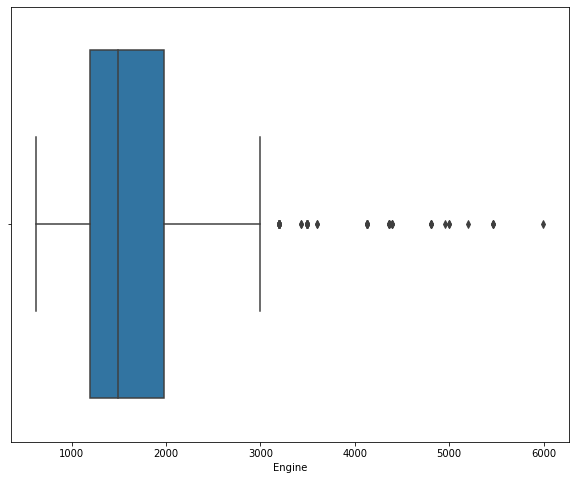

In [247]:
sb.boxplot(x= 'Engine',data = df)

In [248]:
Q3 = df.Engine.quantile(.75)
Q1 = df.Engine.quantile(.25) 
IQR=Q3-Q1 
df = df[~((df.Engine < (Q1 - 1.5 * IQR)) |(df.Engine > (Q3 + 1.5 * IQR)))]              

We tried and tested a number of techniques for outlier identification and their subsequent removal and we got the best R2 scores for the IQR method.

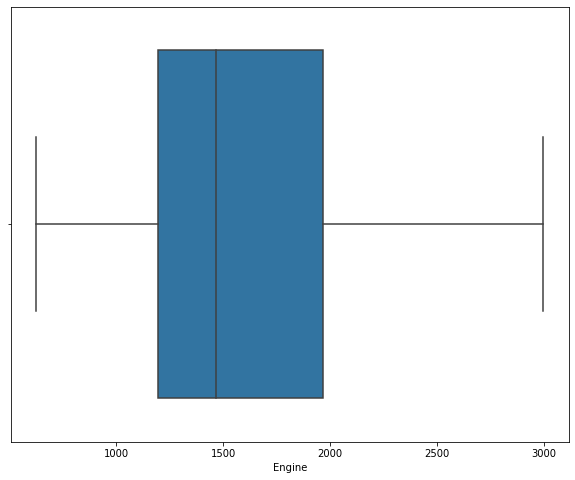

In [249]:
sb.boxplot(x= 'Engine',data = df)

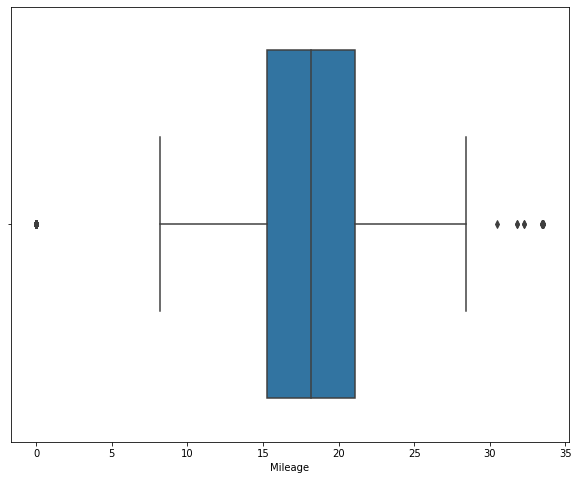

In [250]:
sb.boxplot(x='Mileage',data = df)

In [251]:
Q3 = df.Mileage.quantile(.75)
Q1 = df.Mileage.quantile(.25) 
IQR=Q3-Q1 
df = df[~((df.Mileage < (Q1 - 1.5 * IQR)) |(df.Mileage > (Q3 + 1.5 * IQR)))]                 

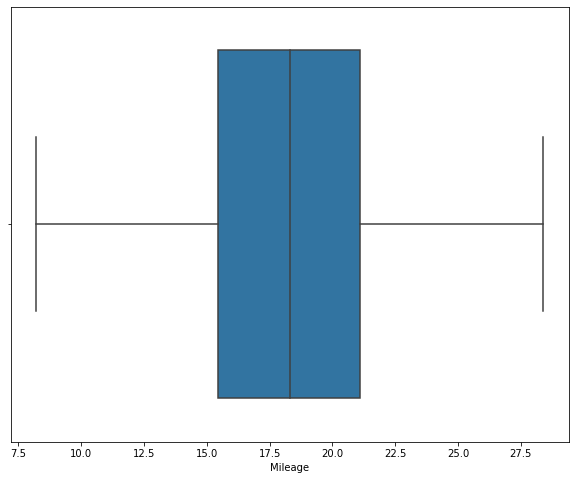

In [252]:
sb.boxplot(x='Mileage',data=df)

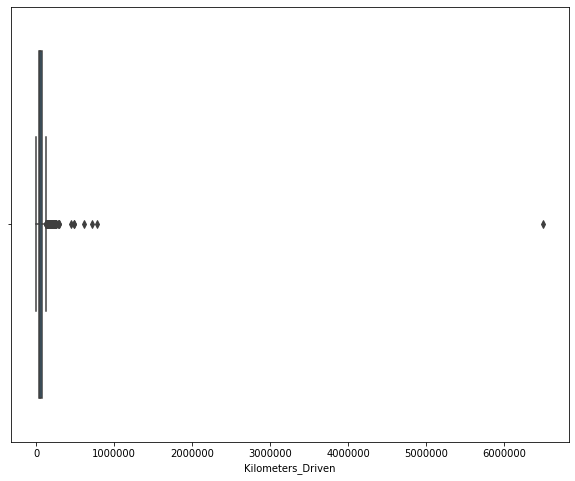

In [253]:
sb.boxplot(x='Kilometers_Driven',data=df)

In [254]:
Q3 = df.Kilometers_Driven.quantile(.75)
Q1 = df.Kilometers_Driven.quantile(.25) 
IQR=Q3-Q1 
df = df[~((df.Kilometers_Driven < (Q1 - 1.5 * IQR)) |(df.Kilometers_Driven > (Q3 + 1.5 * IQR)))]
                 

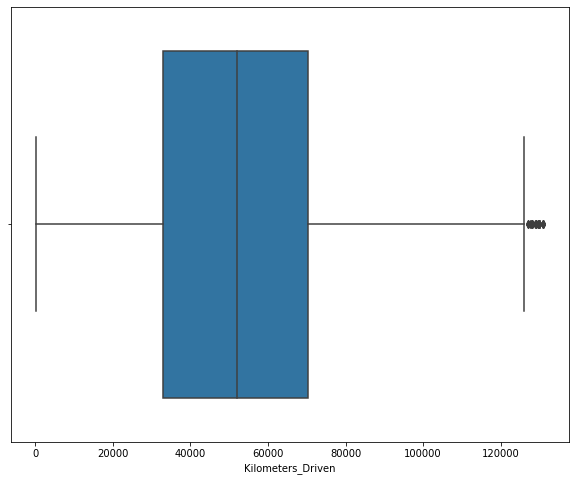

In [255]:
sb.boxplot(x='Kilometers_Driven',data=df)

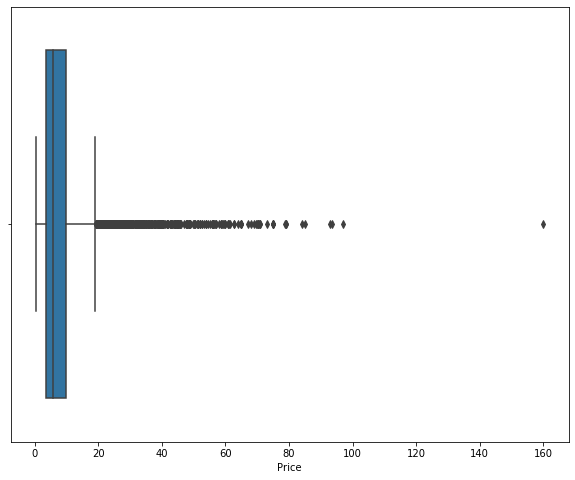

In [256]:
sb.boxplot(x='Price',data=df)

In [257]:
Q3 = df.Price.quantile(.75)
Q1 = df.Price.quantile(.25) 
IQR=Q3-Q1 
df = df[~((df.Price < (Q1 - 1.5 * IQR)) |(df.Price> (Q3 + 1.5 * IQR)))]             

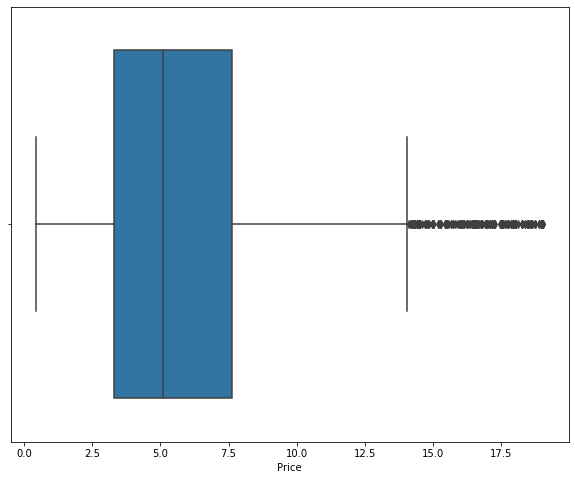

In [258]:
sb.boxplot(x='Price',data=df)

In [259]:
df['Power']=df['Power'].str.replace('null','0').astype(float)

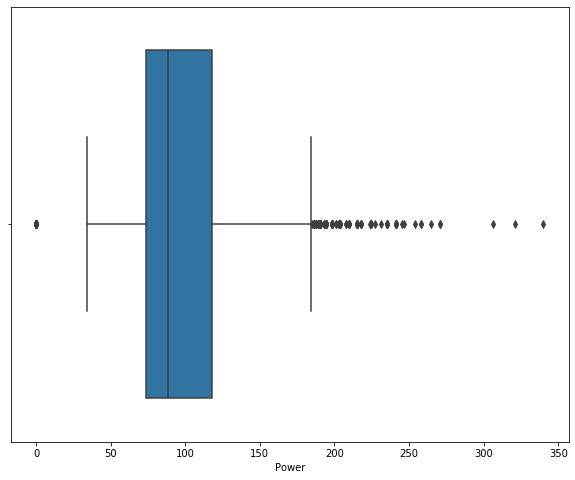

In [260]:
sb.boxplot(x="Power",data=df)

In [261]:
Q3 = df.Power.quantile(.75)
Q1 = df.Power.quantile(.25) 
IQR=Q3-Q1 
df = df[~((df.Power < (Q1 - 1.5 * IQR)) |(df.Power> (Q3 + 1.5 * IQR)))]
                 

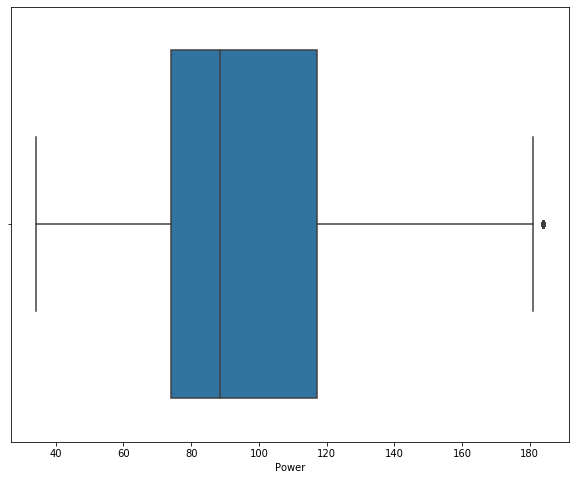

In [262]:
sb.boxplot(x='Power',data=df)

Splitting up of the name coulmn into brand name, model and version. 

In [263]:
Brandname=[] 
Modelname=[] 
ver=[] 

for i,j in df.iterrows(): 
    Brandname.append(j['Name'].split()[0].lower()) 
    Modelname.append("".join(j['Name'].split()[1:3]).lower()) 
    ver.append("".join(j['Name'].split()[2:]).lower()) 
    
df['brand']=Brandname 
df['model']=Modelname 
df['version']=ver

In [264]:
# Using label encoding for brand, model and name.
df['brand_name'] = le.fit_transform(df['brand']) 
df['model_name'] = le.fit_transform(df['model']) 
df['Version'] = le.fit_transform(df['version'])

## Exploratory Data Analysis

In [265]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,fuel_type,transmission,owner_type,location,brand,model,version,brand_name,model_name,Version
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998,58.16,...,0,1,0,9,maruti,wagonr,rlxicng,14,479,1009
1,Hyundai Creta 1.6 CRDi SX Option,Pune,17,41000,Diesel,Manual,First,19.67,1582,126.20,...,1,1,0,10,hyundai,creta1.6,1.6crdisxoption,9,121,211
2,Honda Jazz V,Chennai,13,46000,Petrol,Manual,First,18.20,1199,88.70,...,3,1,0,2,honda,jazzv,v,8,264,1161
3,Maruti Ertiga VDI,Chennai,14,87000,Diesel,Manual,First,20.77,1248,88.76,...,1,1,0,2,maruti,ertigavdi,vdi,14,169,1174
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,15,40670,Diesel,Automatic,Second,15.20,1968,140.80,...,1,0,2,3,audi,a4new,new2.0tdimultitronic,1,12,949


The most frequent kilometers driven before sellin is between  34000.0 and  71400.0


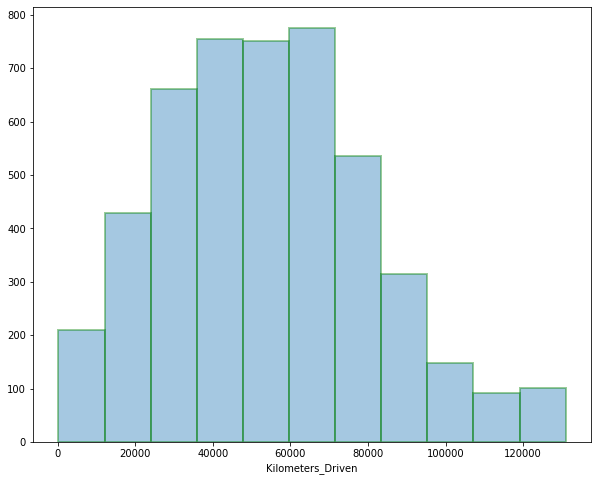

In [266]:
# Histogram depecting most frequent kilometer driven before selling the car.

sb.distplot(df['Kilometers_Driven'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="g", linewidth=2)) 
Q3 = df.Kilometers_Driven.quantile(.75)
Q1 = df.Kilometers_Driven.quantile(.25) 
print('The most frequent kilometers driven before sellin is between ',Q1,'and ',Q3)

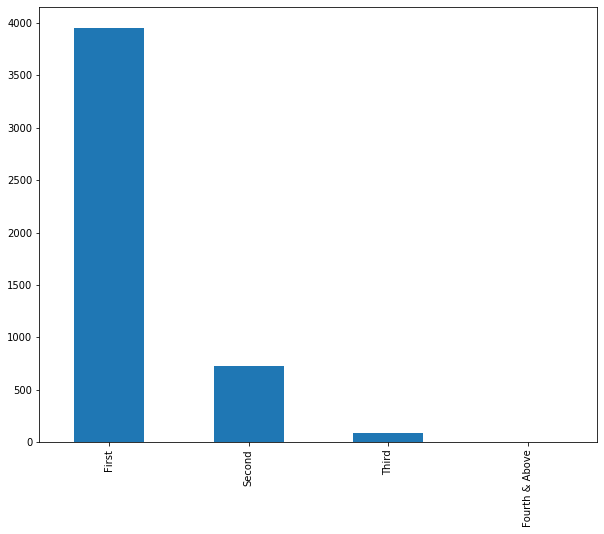

In [267]:
#bar plot show the number of each type of owner

df.Owner_Type.value_counts().plot(kind='bar')

Majority of the used cars that are being sold are second-hand cars, i.e, the owner has bought it from the original dalers and is selling it for the first time after use. 
We also infer that the people selling it for the seccond time is one-fifth of the people who are selling for the first time an also very few people sell the car four or more times. 


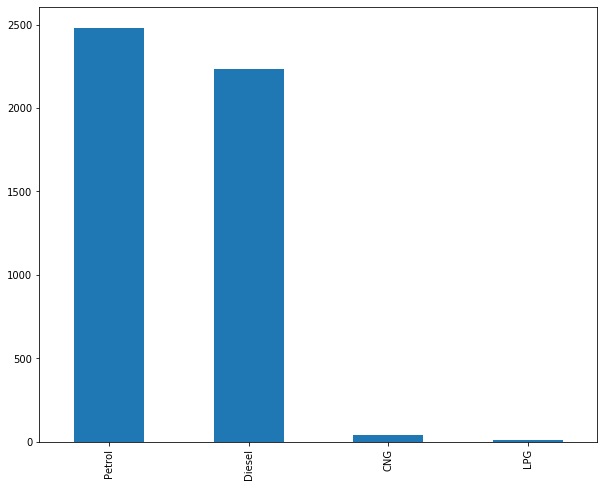

In [268]:
df.Fuel_Type.value_counts().plot(kind='bar')

The number of second hand pertrol cars for sale is the highest followed by diesel cars. Very few cars use CNG or LPG as their fuel source.

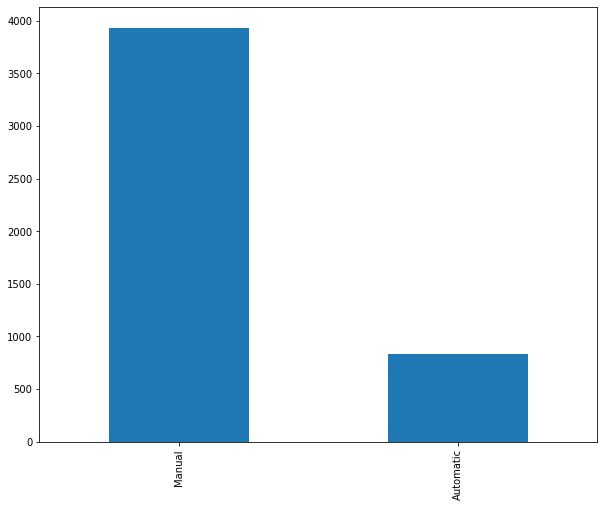

In [269]:
df.Transmission.value_counts().plot(kind='bar')

Manual cars outnumber the automatic ones.

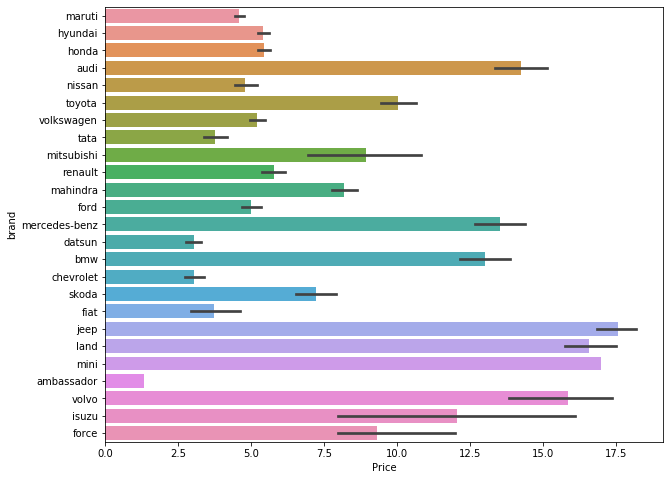

In [270]:
sb.barplot(data=df,y='brand',x='Price') 

* Among the range of all the cars present the cars belonging to the brand Mercedes-Benz and Audi are the most expensive ones followed by Force and Isuzu.  
* The least expensive ones are from companies like Ambassador, Chevrolet and Tata.

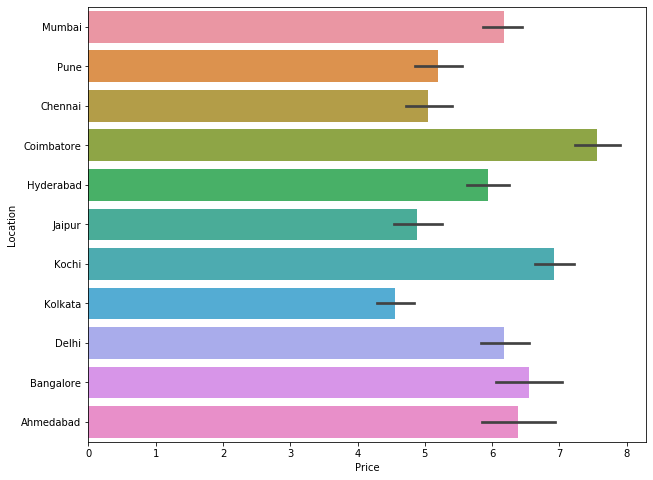

In [271]:
sb.barplot(data=df,y='Location',x='Price')  
plt.show() 


The price of second hand cars are quite expensive in Coimbatore, Kochi and Bangalore (i.e, 10-12) than the remaining states.

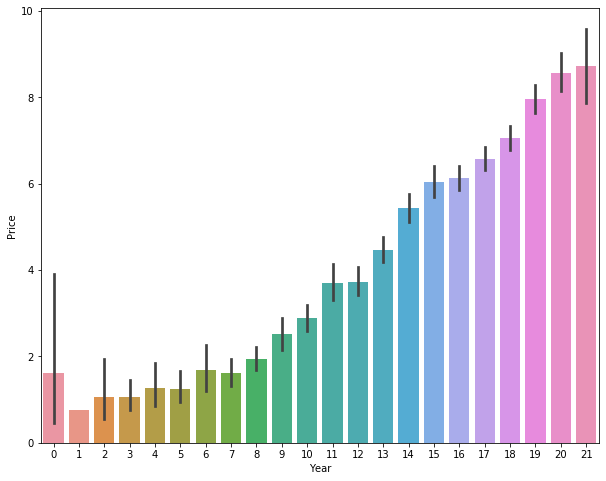

In [272]:
sb.barplot(data=df,x='Year',y='Price')  
plt.show() 

As the years progess the price of the second hand cars also increases.

In [273]:
from scipy.stats import spearmanr 

C:\Users\Shiv\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


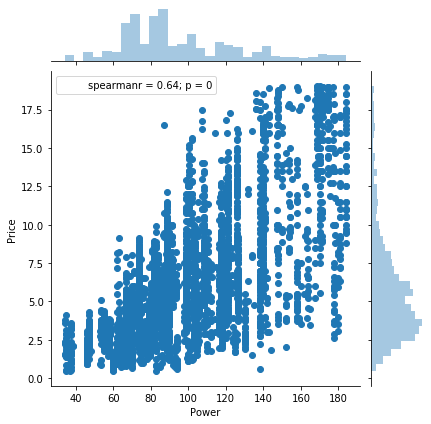

In [274]:
sb.jointplot(x="Power", y="Price", data=df, stat_func=spearmanr) 


The above joint plot with spearmanr value helps us conclude that there is a strong correlation between price and the power.

Most of the second hand cars have an engine range between 1197 and 1591


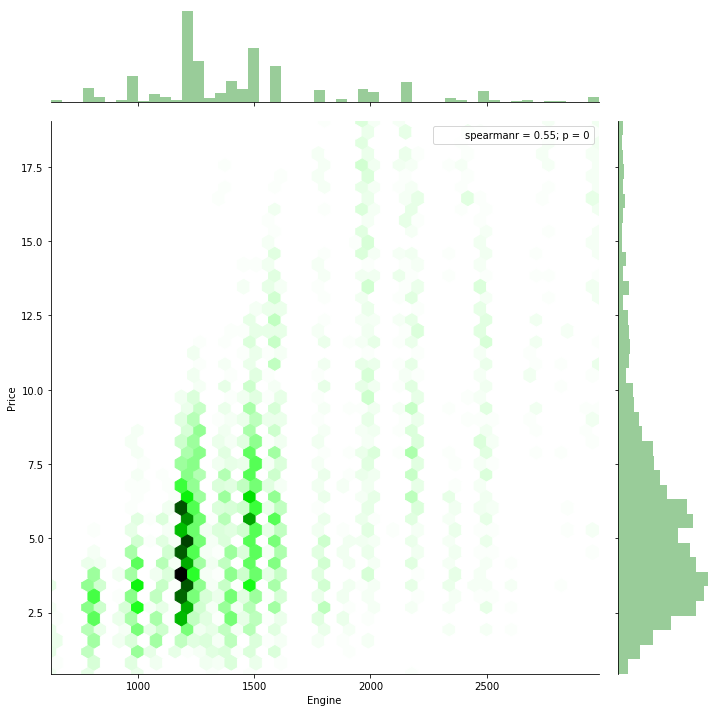

In [275]:
sb.jointplot(x="Engine", y="Price", data=df,kind="hex",height=10,color="g",stat_func=spearmanr) 
Q3 = df.Engine.quantile(.75)
Q1 = df.Engine.quantile(.25) 
print('Most of the second hand cars have an engine range between',int(Q1),'and',int(Q3))

* The engines which range between 1197CC and 1498CC sold at prices ranging from 3.5 to 7.  
* Very few second hand cars have an engine beyond 1700CC. 

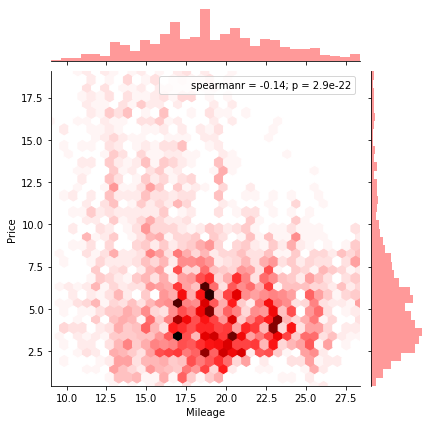

Most of the second hand cars have a mileage between  16.47 and  21.9


In [276]:
sb.jointplot("Mileage", "Price", data=df,
                 kind="hex",color="r",stat_func=spearmanr) 
plt.show() 
Q3 = df.Mileage.quantile(.75)
Q1 = df.Mileage.quantile(.25)  
print('Most of the second hand cars have a mileage between ',Q1 ,'and ',Q3) 

We observe a very slight relationship between the price an the mileage 

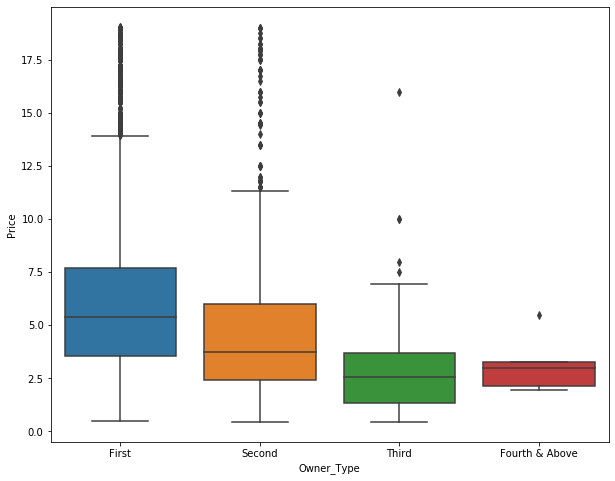

In [277]:
sb.boxplot(x='Owner_Type',y='Price',data=df)

Cars being sold for the first time are more expensive than the ones sold two or more times.

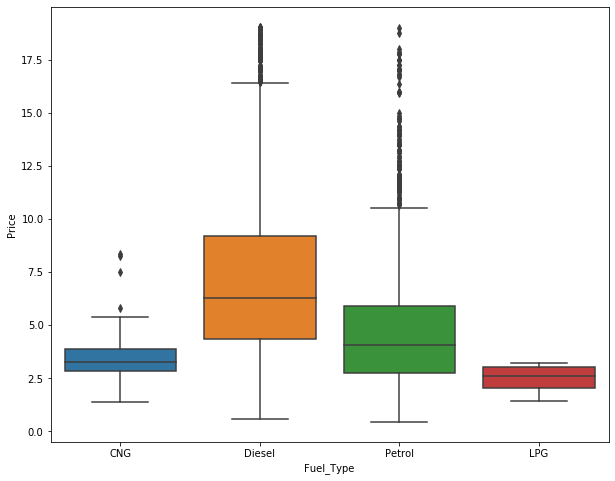

In [278]:
sb.boxplot(x="Fuel_Type",y= "Price", data=df) 


Diesel cars are comparitively more expensive than the rest.

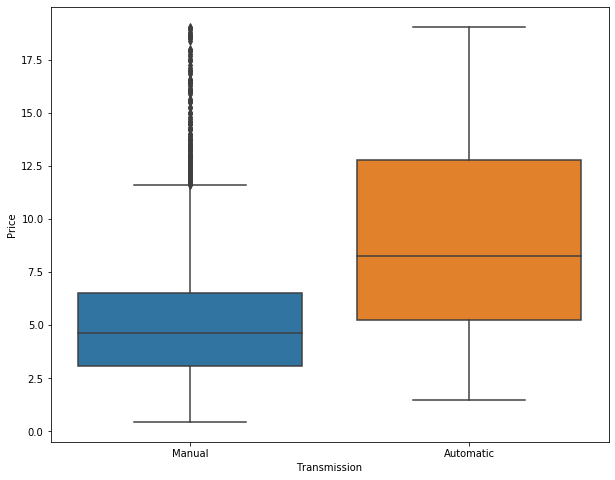

In [279]:
sb.boxplot(x='Transmission',y='Price',data=df) 
plt.show()


The automatic vehicles are more expensive than the manual ones.

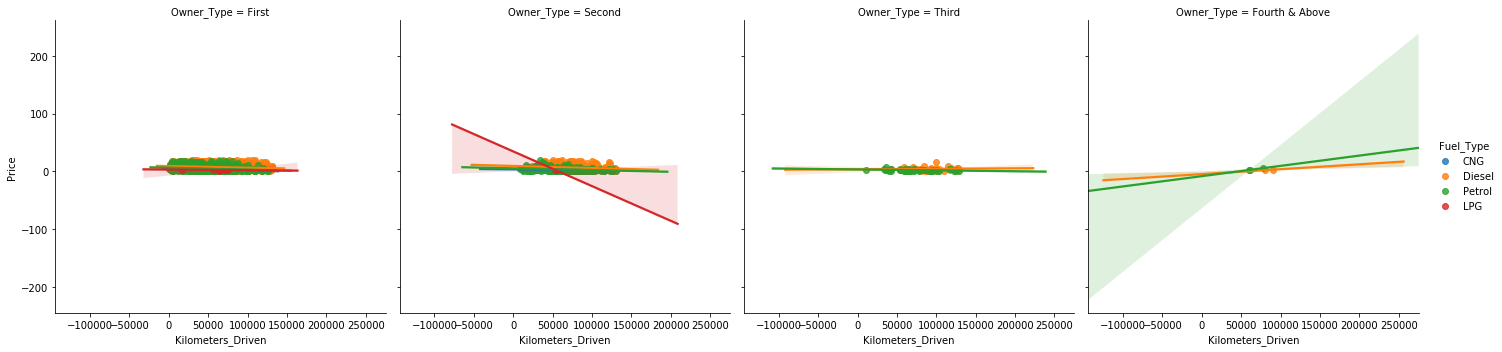

In [280]:
sb.lmplot('Kilometers_Driven', 'Price', data=df, 
           hue='Fuel_Type',
           col='Owner_Type')    

* From the above lymplot we observe that there is negative relationship between the the price and the kilometers driven. So more the kilometers driven lesser is the price. 
* Most of the car sold have the fuel type of diesel or petrol. But among the two the diesel cars are sold for a higher price. 


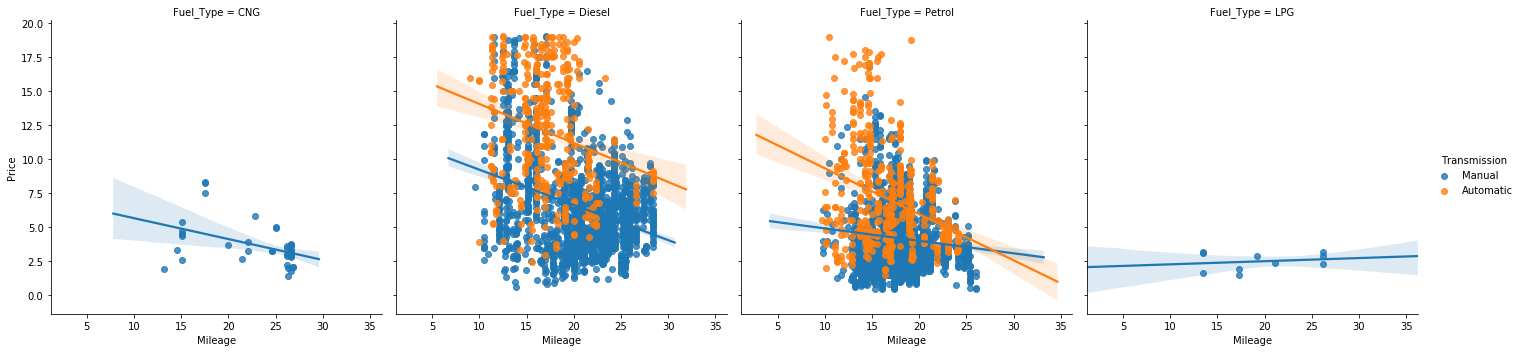

In [281]:
sb.lmplot('Mileage', 'Price', data=df, 
           hue='Transmission',
           col='Fuel_Type')    

Mileage and price have a slight negative relationship.

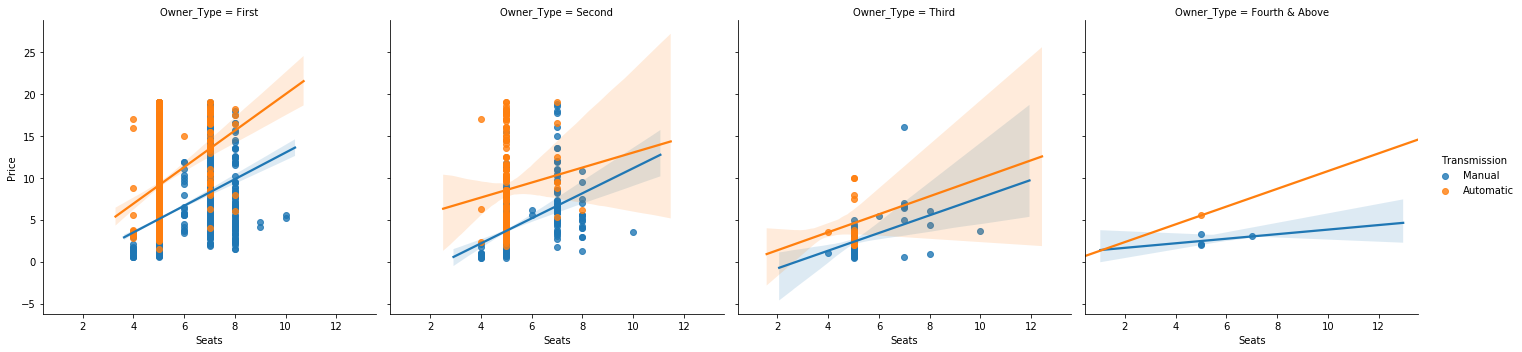

In [282]:
sb.lmplot('Seats', 'Price', data=df, 
           hue='Transmission',
           col='Owner_Type') 

The seats and price show a positive relation 

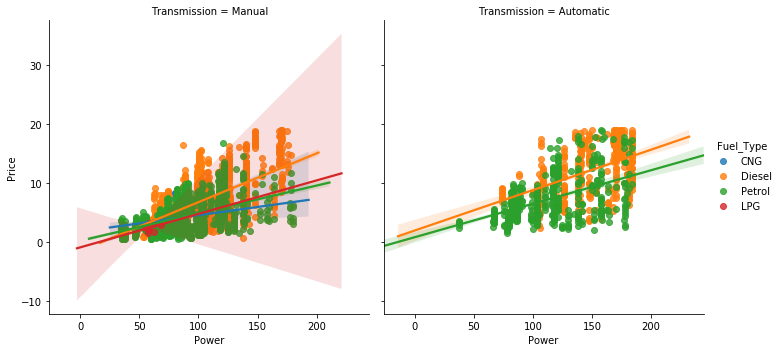

In [283]:
sb.lmplot('Power', 'Price', data=df, 
           hue='Fuel_Type',
           col='Transmission') 

Power and Price are directly proportional to each other

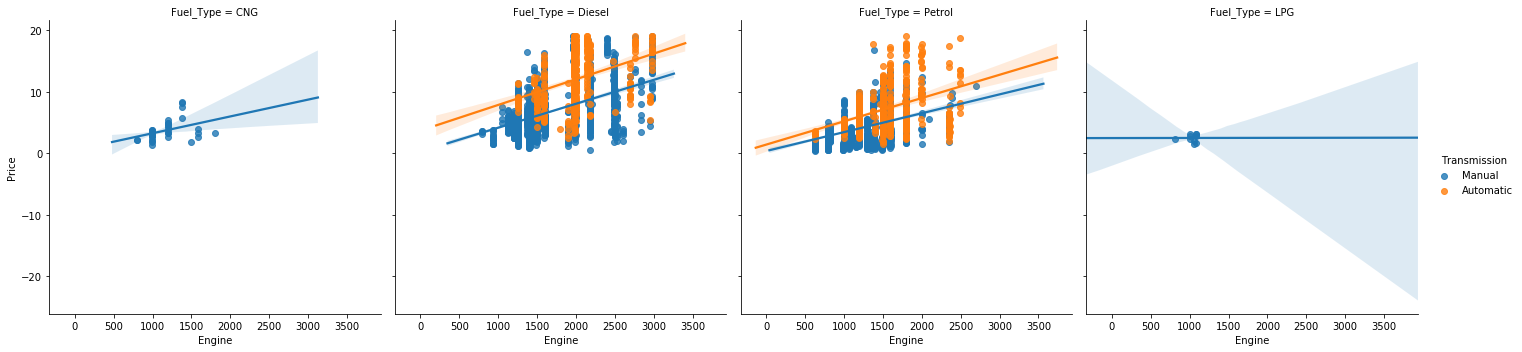

In [284]:
sb.lmplot('Engine', 'Price', data=df, 
           hue='Transmission',
           col='Fuel_Type') 

Engine and power have positive relation except in the case of automatic transmission in diesel cars where a negative relation is observed.

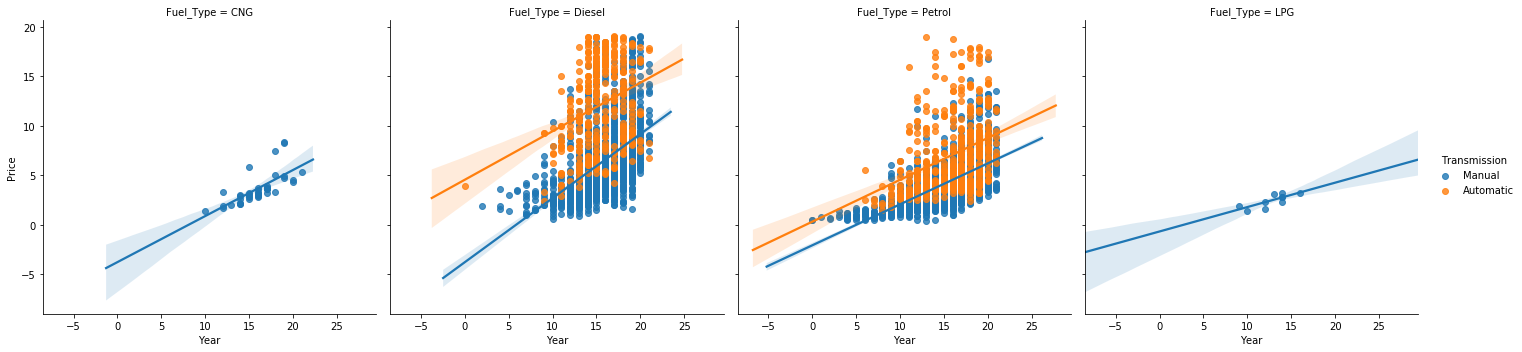

In [285]:
sb.lmplot('Year', 'Price', data=df, 
           hue='Transmission',
           col='Fuel_Type') 

From the  above plot which relates price with year, transmission and fuel type, we see a positiive relation.
The cars with automatic transmission sell for a higher price than those with manual transmission.

In [286]:
# A chart representing the the car branda, their models and version, the number of such cars on sale;  
#also their maximum and minimum value.
df.groupby(['brand','model','version'])['Price'].agg(['count','min','max']).reset_index()

,brand,model,version,count,min,max
0,ambassador,classicnova,novadiesel,1,1.35,1.35
1,audi,a335,35tdiattraction,1,16.50,16.50
2,audi,a335,35tdipremiumplus,1,18.90,18.90
3,audi,a41.8,1.8tfsi,2,8.50,9.50
4,audi,a41.8,1.8tfsitechnologyedition,1,17.50,17.50
...,...,...,...,...,...,...
1436,volkswagen,ventotsi,tsi,1,7.75,7.75
1437,volvo,s60d3,d3,1,12.00,12.00
1438,volvo,s60d4,d4kinetic,1,16.00,16.00
1439,volvo,v40cross,crosscountryd3,1,16.00,16.00


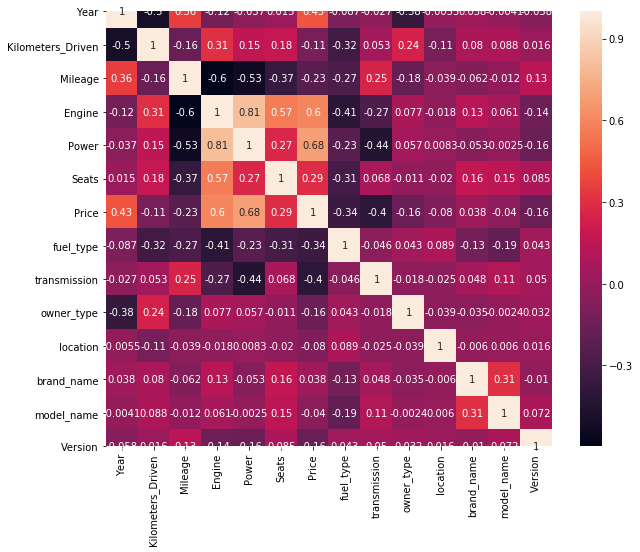

In [287]:
# Heat map to sum up the analysis.
sb.heatmap(df.corr(),annot=True)

## Conclusion of EDA 
* The cars being sold for the first time are more explensive than those sold two or more times. 
* The price of cars also depends on the companies they were manufactured and also the location in which they are being sold. 
* A car running on diesel is priced higher than those running on petrol or CNG. Also automatic cars cost more than manual ones.
* Price of a car decreases as the mileage and kilometers driven increases. However, the price inceases as the number of seats, powe, engine type, and year of sale increases.


# Data Scaling

For kilometers_driven

171 	 131000


(array([241., 539., 750., 827., 887., 669., 439., 197., 105., 115.]),
 array([   171. ,  13253.9,  26336.8,  39419.7,  52502.6,  65585.5,
         78668.4,  91751.3, 104834.2, 117917.1, 131000. ]),
 <a list of 10 Patch objects>)

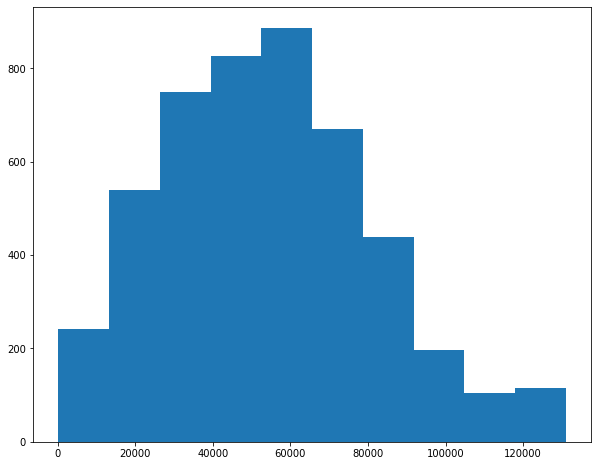

In [288]:
print(np.min(df['Kilometers_Driven']), "\t", np.max(df['Kilometers_Driven']))
plt.hist(df['Kilometers_Driven'])

We will be using a standard scaler, because it gives better results than a min-max scaler

In [289]:
mean = np.mean(df['Kilometers_Driven'])
std = np.std(df['Kilometers_Driven'])
df["Kilometers_Driven"] = df['Kilometers_Driven'].apply(lambda x: (x - mean)/std)

(array([241., 539., 750., 827., 887., 669., 439., 197., 105., 115.]),
 array([-2.00429953, -1.51891772, -1.0335359 , -0.54815409, -0.06277227,
         0.42260954,  0.90799135,  1.39337317,  1.87875498,  2.3641368 ,
         2.84951861]),
 <a list of 10 Patch objects>)

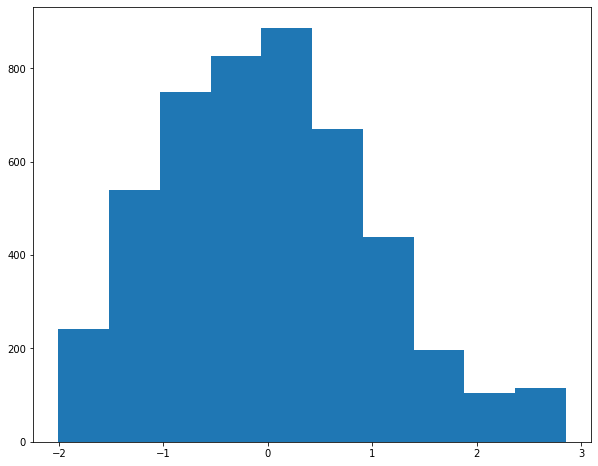

In [290]:
plt.hist(df['Kilometers_Driven'])

# Train test split

In [291]:
df['Price'].head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

We now create an array of the Price column from our dataframe and drop it from the dataframe subsequently.

In [292]:
y = df['Price']
df = df.drop(['Price'], axis=1)

In [293]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,fuel_type,transmission,owner_type,location,brand,model,version,brand_name,model_name,Version
0,Maruti Wagon R LXI CNG,Mumbai,12,0.660591,CNG,Manual,First,26.60,998,58.16,...,0,1,0,9,maruti,wagonr,rlxicng,14,479,1009
1,Hyundai Creta 1.6 CRDi SX Option,Pune,17,-0.489524,Diesel,Manual,First,19.67,1582,126.20,...,1,1,0,10,hyundai,creta1.6,1.6crdisxoption,9,121,211
2,Honda Jazz V,Chennai,13,-0.304022,Petrol,Manual,First,18.20,1199,88.70,...,3,1,0,2,honda,jazzv,v,8,264,1161
3,Maruti Ertiga VDI,Chennai,14,1.217098,Diesel,Manual,First,20.77,1248,88.76,...,1,1,0,2,maruti,ertigavdi,vdi,14,169,1174
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,15,-0.501767,Diesel,Automatic,Second,15.20,1968,140.80,...,1,0,2,3,audi,a4new,new2.0tdimultitronic,1,12,949


We now drop all the columns with categorical data and then move to the splitting of the dataset

In [294]:
df = df.drop(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand', 'model', 'version'], axis=1)

In [295]:
df.reset_index(drop = True, inplace = True)
y.reset_index(drop = True, inplace = True)

In [296]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.25)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3576, 13)
(3576,)
(1193, 13)
(1193,)


The resulting shapes are proof that the splitting has taken place properly and we are now ready for training our models

# ML Regression

In [297]:
x_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type,transmission,owner_type,location,brand_name,model_name,Version
1289,14,0.289586,12.05,2179,120.00,8.0,1,1,0,8,13,402,1195
4476,17,-1.194396,26.60,998,58.16,5.0,0,1,0,9,14,479,1009
2193,12,0.660591,12.05,2179,120.00,8.0,1,1,0,4,13,402,1197
166,17,-1.006816,15.29,1591,121.30,5.0,3,1,2,4,9,121,254
2904,16,0.041013,19.87,1461,83.80,5.0,1,1,0,0,19,126,464


In [298]:
y_train.head()

1289    6.25
4476    3.65
2193    4.40
166     8.15
2904    4.75
Name: Price, dtype: float64

In [299]:
x_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type,transmission,owner_type,location,brand_name,model_name,Version
3074,15,0.849209,28.40,1248,73.75,5.0,1,1,0,6,14,133,1174
1475,17,-0.155620,18.20,1248,73.74,8.0,1,1,0,8,3,156,90
3294,15,0.029882,15.10,2179,140.00,7.0,1,1,0,10,13,496,1258
2996,15,0.178284,20.36,1197,78.90,5.0,3,1,0,5,9,229,1112
3899,16,-0.113548,24.00,1120,70.00,5.0,1,1,0,7,9,221,837


In [300]:
y_test.head()

3074    4.95
1475    4.30
3294    8.50
2996    3.45
3899    4.72
Name: Price, dtype: float64

We start with a Linear Regression model because it is the simplest kind of regression model we know of. 

We will be using sklearn module for importing our models and metrics because it allows us to operate at a very high level of abstraction and implement the models with minimum lines of code.

### Linear Regression

In [301]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score

In [302]:
lireg=LinearRegression()

lireg.fit(x_train, y_train)
y_pred=lireg.predict(x_test)

print("Training Accuracy:", lireg.score(x_train, y_train))
print("Testing Accuracy:", lireg.score(x_test, y_test))
print("R2 score:", r2_score(y_test, y_pred))

Training Accuracy: 0.7363984998302586
Testing Accuracy: 0.7494251909845161
R2 score: 0.7494251909845161


The R2 score is not upto the mark. A little bit of tuning of the hyperparameters could improve the R2 score a bit, but the improvement will be marginal. As we require scores of around 90, we will try other regression models

Our next choice is regression using Support Vector Machines.

### Support Vector Machines

In [303]:
from sklearn.svm import SVR
classifier = SVR(kernel='rbf', gamma = 'auto')
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

print("R2 score:", metrics.r2_score(y_test, y_pred_svm))

R2 score: 0.4050177241210404


Clearly, this model performs much worse than our linear regression models, therefore, we need to think of non-linear models

Our next choice is the ensemble methods, or particularly, the random forest ensemble method

### Random Forest Regressor

In [312]:
from sklearn.ensemble import RandomForestRegressor
ranForReg = RandomForestRegressor(n_estimators = 400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap=False)

It must be brought to notice that the parameters used here were not arbitrarily chosen. They were calculated from the randomized search optimisation we have used later. But because the training and optimisation takes a very long time, we have used the results here directly to avoid wasting time every time we run the notebook.

In [313]:
ranForReg.fit(x_train, y_train)
y_pred_rf = ranForReg.predict(x_test)

In [314]:
print("R2 score: ", r2_score(y_test, y_pred_rf))

R2 score:  0.9210909275543144


The R2 score is quite satisfactory and this model will suit our purposes very well. However, to make sure our scores are stable, we will also calculate the Cross Validation Score for good measure

In [315]:
print("Cross Validation RF score: ", cross_val_score(ranForReg, x_train, y_train, cv=5))

Cross Validation RF score:  [0.90414351 0.9024036  0.91245905 0.91207969 0.91733947]


The cross validation scores are on par with our R2 score, hence we can be confident in our choice of model.

Although our Random forest model gave a food enough score, there is some room for improvement. We had used arbitrary parameters for creating our model, and we now seek to optimise that by using the randomized search technique

In [309]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [316]:
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# rf_random.fit(x_train, y_train)

In [317]:
# rf_random.best_params_

The two cells above have been commented out to save time while running the notebook for checking the code. Evaluators can un_comment the code and verify the results

### Gradient Boost Regressor

Just for good measure, we also use the Gradient Booster Regressor with Randomized search optimisation to make another set of predictions and see how that model functions on our dataset

In [318]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(loss = 'huber')
num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(grb, param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

random_search.fit(x_train, y_train)

C:\Users\Shiv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='huber',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       

In [319]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'learning_rate': 0.05}

In [320]:
y_pred_grb = random_search.predict(x_test)
print("R2 score: ", r2_score(y_test, y_pred_grb))

R2 score:  0.9073947782436826


The performance of both ensemble methods are very very similar, and the result is quite satisfactory

# Conclusion

From the code written above, a few things are clear:
1. EDA shows that the price of a used car depends heavily on the brand of the car, as well as on the place where the car is being sold.
2. Sellers tend to pay more for a newer car with less kilometers on its meter than for an older one that has been driven for fewer miles.
3. The regression models showed that the non-linear ensemble methods were much better at predicting the prices of cars than the linear models.
4. The randomized search algorithms did increase the accuracy of the model, albeit only marginally, in both the models.
5. The grid search algorithm might give slightly better optimization, but the increased time it requires to perform its task may render it unusable for many problems.